# TCN using keras

In [1]:
# Keras (tensorflow as backend)
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Sklearn
from sklearn.metrics import confusion_matrix

# Custom libraries
import sys
sys.path.append("..")

from my_lib import tcn_utils as tcnu
from my_lib import general_utils as gu
from my_lib import model_evaluation_utils as meu
from my_lib import visualization_utils as vu

# Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itables import show
from itables import options as opt
opt.maxBytes = 0
opt.maxColumns = 0

/root/anaconda3/envs/env_exadata/lib/python3.7/site-packages/tensorflow_addons/utils/ensure_tf_install.py:68: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.2.0 and strictly below 2.3.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.1.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


AttributeError: module 'tensorflow_core._api.v2.random' has no attribute 'Generator'

In [ ]:
timeseries_receptive_field = 32

###### Read Dataset and get training, validation and test data

In [ ]:
# Parameters for train, validation and test split
train_test_split_rate = 0.2
validation_split = 0.2

In [ ]:
dataset = pd.read_csv('../dataset/final_data/final_data_full.csv').set_index(['node', 'timestamp'])

In [2]:
### Execute this Block Just if you want to filter dataset observations based on distances from next rising anomaly
distances = gu.get_distances_from_next_rising_anomaly(dataset)
dataset = gu.reduce_dataset_on_rising_anomaly_distances(dataset, distances, 1000) # * This step could be arbitrarily removed

NameError: name 'gu' is not defined

In [3]:
x_train, y_train, x_valid, y_valid, x_test, y_test = gu.train_valid_test_split( dataset, \
                                                                                train_test_split_rate=train_test_split_rate, \
                                                                                train_valid_split_rate=validation_split)

NameError: name 'gu' is not defined

###### Build model
* Residual Connections between causal dilated convolutions: Yes
* No final dropout
* timeseries receptive field: 32 observations

In [4]:
tcn = tcnu.build_tcn(timeseries_receptive_field, x_train.shape[1], kernel_size=2, use_residual_connections=True, final_dropout_rate=0)

NameError: name 'tcnu' is not defined

In [5]:
tcn.summary()

NameError: name 'tcn' is not defined

In [6]:
# plot_model(tcn, to_file='../models/basic_tcn_architecture.png', show_shapes=True)

##### Get timeseries generators for training and validation data

* target_data (labels) is automatically shifted 1 step ahead of input_data
* batch_size is intended to be different for the last batch
* output shape is <batch_size, timeseries_receptive_field, n_features> (for each training/validation step)

Documentation: [keras - TimeseriesGenerator](https://keras.io/preprocessing/sequence/#timeseriesgenerator)

In [7]:
# Parameters for generator
train_batch_size = 64
valid_batch_size = 32

In [8]:
train_generator = TimeseriesGenerator(data=x_train, targets=y_train, length=timeseries_receptive_field, batch_size=train_batch_size)
valid_generator = TimeseriesGenerator(data=x_valid, targets=y_valid, length=timeseries_receptive_field, batch_size=valid_batch_size)

NameError: name 'x_train' is not defined

In [13]:
# tcnu.print_generator_data_flow(valid_generator)

number of batches:  519
0  - in_data shape:  (32, 128, 113)
0  - out_data shape:  (32, 3)
0 [[[0.00000000e+00 0.00000000e+00 3.51172311e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.35980081e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.54555685e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 1.64462285e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 2.23350792e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 5.49125930e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 1.35980081e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.54555685e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.97928971e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000

62 [[[0.00000000e+00 0.00000000e+00 1.83637012e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 5.30928449e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.13429582e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 1.52836195e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 3.31323414e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 2.05714207e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 5.30928449e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.13429582e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 3.92538903e-02 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 3.31323414e-04 ... 1.00000000e+00
   0.00

122 [[[9.82558411e-01 0.00000000e+00 4.15102342e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [9.82558411e-01 0.00000000e+00 3.98882717e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [9.82558411e-01 0.00000000e+00 4.49339065e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [9.82558411e-01 0.00000000e+00 1.90716753e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [9.82558411e-01 0.00000000e+00 3.48652884e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [9.82558411e-01 0.00000000e+00 4.44892746e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]]

 [[9.82558411e-01 0.00000000e+00 3.98882717e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [9.82558411e-01 0.00000000e+00 4.49339065e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [9.82558411e-01 0.00000000e+00 3.54403257e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [9.82558411e-01 0.00000000e+00 3.48652884e-04 ... 1.00000000e+00
   0.0

181 [[[9.82558411e-01 0.00000000e+00 1.38786495e-01 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [9.82558411e-01 0.00000000e+00 1.23422205e-01 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [9.82558411e-01 0.00000000e+00 9.55275517e-05 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [9.82558411e-01 0.00000000e+00 1.90925403e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [9.82558411e-01 0.00000000e+00 1.60496244e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [9.82558411e-01 0.00000000e+00 3.97350373e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]]

 [[9.82558411e-01 0.00000000e+00 1.23422205e-01 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [9.82558411e-01 0.00000000e+00 9.55275517e-05 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [9.82558411e-01 0.00000000e+00 7.42269107e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [9.82558411e-01 0.00000000e+00 1.60496244e-04 ... 1.00000000e+00
   0.0

243  - in_data shape:  (32, 128, 113)
243  - out_data shape:  (32, 3)
243 [[[0.00000000e+00 0.00000000e+00 2.88231161e-03 ... 0.00000000e+00
   1.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 3.89843412e-03 ... 0.00000000e+00
   1.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 3.67986794e-04 ... 0.00000000e+00
   1.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 1.18628568e-02 ... 0.00000000e+00
   1.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 6.12904716e-03 ... 0.00000000e+00
   1.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.15822121e-02 ... 0.00000000e+00
   1.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 3.89843412e-03 ... 0.00000000e+00
   1.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 3.67986794e-04 ... 0.00000000e+00
   1.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 3.57748706e-03 ... 0.00000000e+00
   1.00000000e+00 0.00000000e+00]
  ...
  [

304 [[[0.00000000e+00 0.00000000e+00 9.64839934e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 2.71546684e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 5.26968456e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 4.70811401e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.20233887e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 3.65668728e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 2.71546684e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 5.26968456e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 8.23675365e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 1.20233887e-03 ... 1.00000000e+00
   0.0

365 [[[0.00000000e+00 0.00000000e+00 6.03538454e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 3.96283885e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.13343080e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 3.45244618e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 5.30850105e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 4.94829802e-02 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 3.96283885e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.13343080e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.01931161e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 5.30850105e-04 ... 1.00000000e+00
   0.0

424 [[[1.00000000e+00 0.00000000e+00 6.80937947e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.00000000e+00 0.00000000e+00 6.20935206e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.00000000e+00 0.00000000e+00 2.17568841e-02 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [1.00000000e+00 0.00000000e+00 1.60101435e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.00000000e+00 0.00000000e+00 1.00508164e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.00000000e+00 0.00000000e+00 3.41985889e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]]

 [[1.00000000e+00 0.00000000e+00 6.20935206e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.00000000e+00 0.00000000e+00 2.17568841e-02 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.00000000e+00 0.00000000e+00 4.49366068e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [1.00000000e+00 0.00000000e+00 1.00508164e-03 ... 1.00000000e+00
   0.0

476 [[[1.00000000e+00 0.00000000e+00 1.27074373e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.00000000e+00 0.00000000e+00 8.58234358e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.00000000e+00 0.00000000e+00 3.43764109e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [1.00000000e+00 0.00000000e+00 2.79321603e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.00000000e+00 0.00000000e+00 2.91765568e-01 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.00000000e+00 0.00000000e+00 2.19313546e-01 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]]

 [[1.00000000e+00 0.00000000e+00 8.58234358e-04 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.00000000e+00 0.00000000e+00 3.43764109e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.00000000e+00 0.00000000e+00 1.29361904e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [1.00000000e+00 0.00000000e+00 2.91765568e-01 ... 1.00000000e+00
   0.0

##### Train the model
Documentation: [keras - Early Stopping](https://keras.io/callbacks/#earlystopping)  
Documentation: [keras - fit](https://keras.io/models/model/#fit)

In [41]:
# Model fitting parameters
epochs = 10
patience = 10

In [42]:
%%time
cb_es = EarlyStopping(patience=patience, restore_best_weights=True)
history = tcn.fit(train_generator, epochs=epochs, callbacks= [cb_es], validation_data=valid_generator, \
                  steps_per_epoch=len(train_generator), validation_steps = len(valid_generator))

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 1044 steps, validate for 522 steps
Epoch 1/10
1044/1044 [==============================] - 37s 35ms/step - loss: 0.0312 - val_loss: 0.0045
Epoch 2/10
1044/1044 [==============================] - 36s 34ms/step - loss: 0.0061 - val_loss: 0.0044
Epoch 3/10
1044/1044 [==============================] - 35s 34ms/step - loss: 0.0042 - val_loss: 0.0047
Epoch 4/10
1044/1044 [==============================] - 36s 34ms/step - loss: 0.0042 - val_loss: 0.0048
Epoch 5/10
1044/1044 [==============================] - 36s 35ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 6/10
1044/1044 [==============================] - 34s 33ms/step - loss: 0.0044 - val_loss: 0.0046
Epoch 7/10
1044/1044 [==============================] - 36s 35ms/step - loss: 0.0066 - val_loss: 0.0265
Epoch 8/10
1044/1044 [==============================] - 35s 34ms/step - loss: 0.0064 - val_loss: 0.0047
Epoch 9/10
1044/1044 [==============================] - 35s 34ms/step - loss: 0.0038 - val_loss: 0.0071
Epoch 10/10
1044/10

In [206]:
# tcn.save('./models/tcn_model_100_epochs.h5')

##### Visualize gradient trend

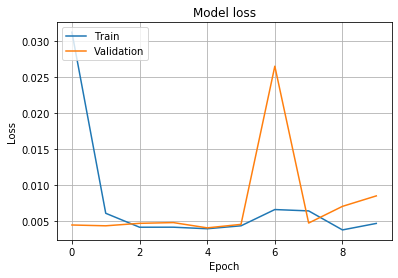

In [43]:
vu.visualize_loss(history)

In [208]:
# plt.savefig('./models/basic_tcn_train_loss_plot.png')

##### Evaluate Results
I suggest to read first `model_evaluation_utils.py` file comments

In [61]:
test_generator = TimeseriesGenerator(data=x_test, targets=y_test, length=timeseries_receptive_field, batch_size=1)
predicted_probabilities = tcn.predict(test_generator).ravel()

In [62]:
predicted_probabilities

array([4.17332080e-09, 5.39756861e-09, 1.38044856e-08, ...,
       1.51506549e-15, 1.19088184e-15, 7.09130531e-16], dtype=float32)

In [64]:
# Parameters for label assignment
lb_probability_threshold = 1e-20
ub_probability_threshold = 1

In [65]:
evaluation_results = meu.compute_best_threhsold(**{'real_y': y_test, \
                                                   'predicted_y': predicted_probabilities, \
                                                   'receptive_field': timeseries_receptive_field, \
                                                   'strategy': 'linear', \
                                                   'growth_mode': 'increment_lb', \
                                                   'start': lb_probability_threshold, \
                                                   'stop': ub_probability_threshold, \
                                                   'num_steps': 100 \
                                                   })

.........................................................
current_LB_threshold: 1.00e-20; current_UB_threshold: 1.00e+00
True Negative (TN):  1188
False Positive (FP):  19653
False Negative (FN):  0
True Positive (TP):  8
--- METRICS ---
accuracy :  0.05736486162405871
precision :  0.00040689690249732976
recall :  1.0
f1_score :  0.0008134628094971784
.........................................................
current_LB_threshold: 1.00e-02; current_UB_threshold: 1.00e+00
True Negative (TN):  20841
False Positive (FP):  0
False Negative (FN):  8
True Positive (TP):  0
--- METRICS ---
accuracy :  0.9996162885510096
precision :  nan
recall :  0.0
f1_score :  nan
.........................................................
current_LB_threshold: 2.00e-02; current_UB_threshold: 1.00e+00
True Negative (TN):  20841
False Positive (FP):  0
False Negative (FN):  8
True Positive (TP):  0
--- METRICS ---
accuracy :  0.9996162885510096
precision :  nan
recall :  0.0
f1_score :  nan
....................

/home/lorenzo/anaconda3/envs/env_exadata/lib/python3.7/my_lib/model_evaluation_utils.py:22: RuntimeWarning: invalid value encountered in long_scalars
  metrics['precision'] = tp / (tp+fp)


True Negative (TN):  20841
False Positive (FP):  0
False Negative (FN):  8
True Positive (TP):  0
--- METRICS ---
accuracy :  0.9996162885510096
precision :  nan
recall :  0.0
f1_score :  nan
.........................................................
current_LB_threshold: 1.30e-01; current_UB_threshold: 1.00e+00
True Negative (TN):  20841
False Positive (FP):  0
False Negative (FN):  8
True Positive (TP):  0
--- METRICS ---
accuracy :  0.9996162885510096
precision :  nan
recall :  0.0
f1_score :  nan
.........................................................
current_LB_threshold: 1.40e-01; current_UB_threshold: 1.00e+00
True Negative (TN):  20841
False Positive (FP):  0
False Negative (FN):  8
True Positive (TP):  0
--- METRICS ---
accuracy :  0.9996162885510096
precision :  nan
recall :  0.0
f1_score :  nan
.........................................................
current_LB_threshold: 1.50e-01; current_UB_threshold: 1.00e+00
True Negative (TN):  20841
False Positive (FP):  0
False Nega

True Negative (TN):  20841
False Positive (FP):  0
False Negative (FN):  8
True Positive (TP):  0
--- METRICS ---
accuracy :  0.9996162885510096
precision :  nan
recall :  0.0
f1_score :  nan
.........................................................
current_LB_threshold: 4.80e-01; current_UB_threshold: 1.00e+00
True Negative (TN):  20841
False Positive (FP):  0
False Negative (FN):  8
True Positive (TP):  0
--- METRICS ---
accuracy :  0.9996162885510096
precision :  nan
recall :  0.0
f1_score :  nan
.........................................................
current_LB_threshold: 4.90e-01; current_UB_threshold: 1.00e+00
True Negative (TN):  20841
False Positive (FP):  0
False Negative (FN):  8
True Positive (TP):  0
--- METRICS ---
accuracy :  0.9996162885510096
precision :  nan
recall :  0.0
f1_score :  nan
.........................................................
current_LB_threshold: 5.00e-01; current_UB_threshold: 1.00e+00
True Negative (TN):  20841
False Positive (FP):  0
False Nega

True Negative (TN):  20841
False Positive (FP):  0
False Negative (FN):  8
True Positive (TP):  0
--- METRICS ---
accuracy :  0.9996162885510096
precision :  nan
recall :  0.0
f1_score :  nan
.........................................................
current_LB_threshold: 8.20e-01; current_UB_threshold: 1.00e+00
True Negative (TN):  20841
False Positive (FP):  0
False Negative (FN):  8
True Positive (TP):  0
--- METRICS ---
accuracy :  0.9996162885510096
precision :  nan
recall :  0.0
f1_score :  nan
.........................................................
current_LB_threshold: 8.30e-01; current_UB_threshold: 1.00e+00
True Negative (TN):  20841
False Positive (FP):  0
False Negative (FN):  8
True Positive (TP):  0
--- METRICS ---
accuracy :  0.9996162885510096
precision :  nan
recall :  0.0
f1_score :  nan
.........................................................
current_LB_threshold: 8.40e-01; current_UB_threshold: 1.00e+00
True Negative (TN):  20841
False Positive (FP):  0
False Nega

In [66]:
meu.print_info(evaluation_results)

--- BEST SCORE INFO ---
True Negative (TN): 1188
False Positive (FP): : 19653
False Negative (FN) 0
True Positive (TP): 8
accuracy: 0.0574
precision: 0.0004
recall: 1.0000
f1_score : 0.0008
LB Threshold 1.00e-20
UB Threshold: 1.00e+00


##### Plot the results
Repeat previous evaluation computations in order to obtain data to plot

In [67]:
predicted_rising_anomalies = meu.assign_class_rising_anomaly(predicted_probabilities, lb_probability_threshold, ub_probability_threshold)
# Avoid first <timeserie_receptive_field> values
y_real_shifted_test = y_test.ravel()[timeseries_receptive_field:]

In [68]:
tn, fp, fn, tp = confusion_matrix(y_real_shifted_test, predicted_rising_anomalies).ravel()
metrics = meu.compute_metrics(tn, fp, fn, tp)

True Negative (TN):  1188
False Positive (FP):  19653
False Negative (FN):  0
True Positive (TP):  8
--- METRICS ---
accuracy :  0.05736486162405871
precision :  0.00040689690249732976
recall :  1.0
f1_score :  0.0008134628094971784


<IPython.core.display.Javascript object>


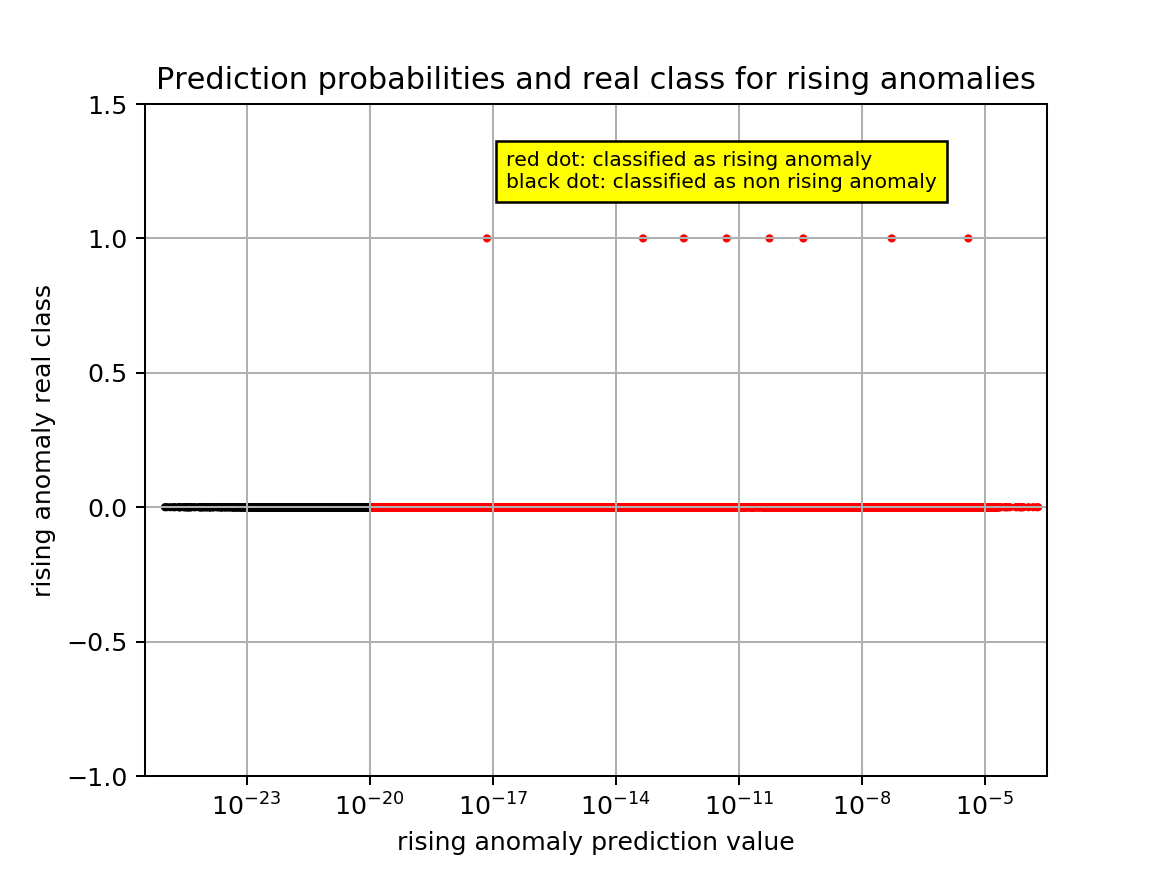

In [69]:
%matplotlib notebook

y_val_negative_class = 0
y_val_positive_class = 1

# Build x axes: rising anomaly prediction value
x_vals = predicted_probabilities[np.where(predicted_probabilities > 1e-25)[0]]
y_vals = y_real_shifted_test[np.where(predicted_probabilities > 1e-25)[0]]
predicted_rising_anomalies_reducted = predicted_rising_anomalies[np.where(predicted_probabilities > 1e-25)[0]]

# Set colors: black for predicted non rising; red for predicted rising
colors = ['black' if pred_rising_anomaly == 0 else 'red' for pred_rising_anomaly in predicted_rising_anomalies_reducted]

# Build the plot
plt.scatter(x_vals, y_vals, marker='o', s=5, color=colors)

# Set axes limits
axes = plt.gca()
axes.set_xlim([np.min(x_vals) - np.min(x_vals)/1.5,np.max(x_vals) + np.max(x_vals)/1.5])
axes.set_ylim([y_val_negative_class - 1, y_val_positive_class + 0.5])
axes.set_xscale('log')

# display legend
axes.text(0.4, 0.9,
         'red dot: classified as rising anomaly\nblack dot: classified as non rising anomaly',
         bbox={'facecolor': 'yellow'}, fontsize=8,
         horizontalalignment='left',
         verticalalignment='center',
         transform = axes.transAxes)

# Naming the axes
axes.set_xlabel('rising anomaly prediction value')
axes.set_ylabel('rising anomaly real class')
axes.set_title('Prediction probabilities and real class for rising anomalies')

plt.grid()
plt.show()

### Using custom generator - For Now, it gives some fixable errors

In particular, using a receptive field larger than the batch size requires some checkings (for now not handled) during data generation.

In [145]:
from tensorflow.python.keras.utils.data_utils import Sequence
from math import ceil

In [141]:
# Generator drawing illustration in copybook
class MyTimeseriesGenerator(Sequence) :
    def __init__(self, input_data, target_data, batch_size=64, dilation_rate=64) :
        self.input_data = input_data
        self.target_data = target_data
        self.batch_size = batch_size
        self.timeseries_receptive_field = dilation_rate * 2
        
    def __len__(self):
        return ceil(len(self.input_data) / self.batch_size)
        
    def __getitem__(self, idx) :        
        # Generate <batch_size> labels with <timeseries_receptive_field> lag        
        # Generate [<batch_size> x <timeseries_receptive_field>] batched data with N channels
        batch_data = []
        batch_target = []
        
        for j in range(self.batch_size) :
            first_idx = idx * self.batch_size + j * self.timeseries_receptive_field
            last_idx = idx * self.batch_size + (j + 1) * self.timeseries_receptive_field
            
            # Avoid inputs that does not fill TCN receptive field
            if last_idx > len(self.input_data) - 1 : 
                break;
                
            batch_data.append(self.input_data[first_idx : last_idx])
            batch_target.append(self.target_data[idx * self.batch_size + self.timeseries_receptive_field + j])
            
        return np.asarray(batch_data), np.asarray(batch_target)
    
    def print_data_flow(self) :
        # input and output components of each sample
        for i in range(len(self)):
            in_x, out_y = self[i]
            print('%s => %s' % (in_x, out_y))

In [143]:
train_generator = MyTimeseriesGenerator(x_train, y_train, train_batch_size, dilation_rate)
valid_generator = MyTimeseriesGenerator(x_valid, y_valid, valid_batch_size, dilation_rate)

In [144]:
train_generator.print_data_flow()

[[[0.00000000e+00 8.51363894e-04 3.76957338e-07 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 1.11527691e-03 1.59763095e-06 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 3.76209937e-04 4.66775947e-08 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 1.29343027e-04 4.25018022e-08 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 5.32515743e-05 1.05310467e-12 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 2.02781720e-04 1.30778151e-08 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 8.21862618e-05 1.52847674e-08 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 9.95831219e-05 2.47926345e-09 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 3.70644635e-04 3.69955494e-08 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 1.78769497e-04 1.41416081e-08 ... 0.00000000e+00
   0.00000

[[[0.00000000e+00 7.09714360e-03 1.55232851e-04 1.14085723e-02
   1.01015607e-06 4.95049505e-02 0.00000000e+00 7.60422306e-01
   7.46266526e-05 1.00000000e+00 0.00000000e+00 1.36645963e-01
   5.07674344e-05 2.25809855e-01 5.83132208e-05 0.00000000e+00
   0.00000000e+00 9.98992540e-01 7.22788297e-29 1.00000000e+00
   8.11399788e-22 2.64432884e-01 1.35342553e-05 2.60230524e-01
   2.18933916e-05 1.94991592e-01 1.28618186e-04 0.00000000e+00
   0.00000000e+00 2.48714775e-01 4.66376284e-06 7.33111937e-01
   3.94948509e-08 0.00000000e+00 0.00000000e+00 1.00000000e+00
   0.00000000e+00 1.61725999e-02 4.88614920e-04 1.48609880e-02
   4.58334478e-05 1.12170654e-01 3.74963519e-05 4.89756625e-01
   1.88016725e-07 1.00000000e+00 0.00000000e+00 0.00000000e+00
   1.00000000e+00 7.05882353e-01 0.00000000e+00 8.29545455e-01
   0.00000000e+00 6.23430962e-01 0.00000000e+00 5.83586626e-01
   6.28711142e-03 1.70064584e-03 4.11778243e-05 1.45210774e-03
   0.00000000e+00 8.74945205e-01 0.00000000e+00 5.43071